<a href="https://colab.research.google.com/github/ziangzhou-duke/econ211/blob/master/credit_limit_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# import code
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

clf = DecisionTreeClassifier()

In [49]:
###show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [104]:
train_data=pd.read_csv('BankChurners.csv')
# train_data['Age_level'] = pd.qcut(train_data.Age_level,3, np.arange(1,4,1))
# train_data['Months_on_book'] = pd.qcut(train_data.Months_on_book,3, np.arange(1,4,1))
cols = ['Marital_Status','Gender','Education_Level','Income_Category']
cols_attr = {col:{list(set(list(train_data[col])))[i-1]:i for i in range(1,len(list(set(list(train_data[col]))))+1)} for col in cols}

In [82]:
cols_attr = {'Education_Level': {'College': 4,
  'Doctorate': 7,
  'Graduate': 5,
  'High School': 3,
  'Post-Graduate': 6,
  'Uneducated': 2,
  'Unknown': 1},
 'Gender': {'F': 0, 'M': 1},
 'Income_Category': {'$120K +': 6,
  '$40K - $60K': 3,
  '$60K - $80K': 4,
  '$80K - $120K': 5,
  'Less than $40K': 2,
  'Unknown': 1},
 'Marital_Status': {'Divorced': 2, 'Married': 4, 'Single': 3, 'Unknown': 1}}

In [108]:
# for section in cols_attr:
#     for attr in cols_attr[section]:
#         try:
#             train_data = train_data.replace(attr,cols_attr[section][attr])
#         except:
#             continue
train_data.head(10)
# train_data['Age_level'] = pd.qcut(train_data.Customer_Age,3, np.arange(1,4,1))
# train_data['Commun_freq'] = pd.qcut(train_data.Months_on_book,3, np.arange(1,4,1))
train_data['Return'] = pd.qcut(train_data.Credit_Limit,3, np.arange(1,4,1))
# train_data['Total_transfer'] = pd.qcut(train_data.Total_Trans_Amt,3, np.arange(1,4,1))
train_data['Rank']=train_data['Return'].apply(lambda x: 'High' if x==3 else 'Average' if x==2 else 'Low')

In [109]:
train_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Return,Rank
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,3,High
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,3,High
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,2,Average
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,2,Average
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,2,Average


In [110]:
train_data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

### Build Decision Tree

In [141]:
feature_names=['Avg_Open_To_Buy','Total_Revolving_Bal']
features=train_data[feature_names]
targets=train_data['Rank']
targets_names = targets.unique()

In [142]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=42)

In [143]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [144]:
#####Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5,random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(train_features,train_targets)

#Predict the response for test dataset
y_pred = clf.predict(test_features)

# Compute test set accuracy  
acc = accuracy_score(y_pred, test_targets)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.95


In [139]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

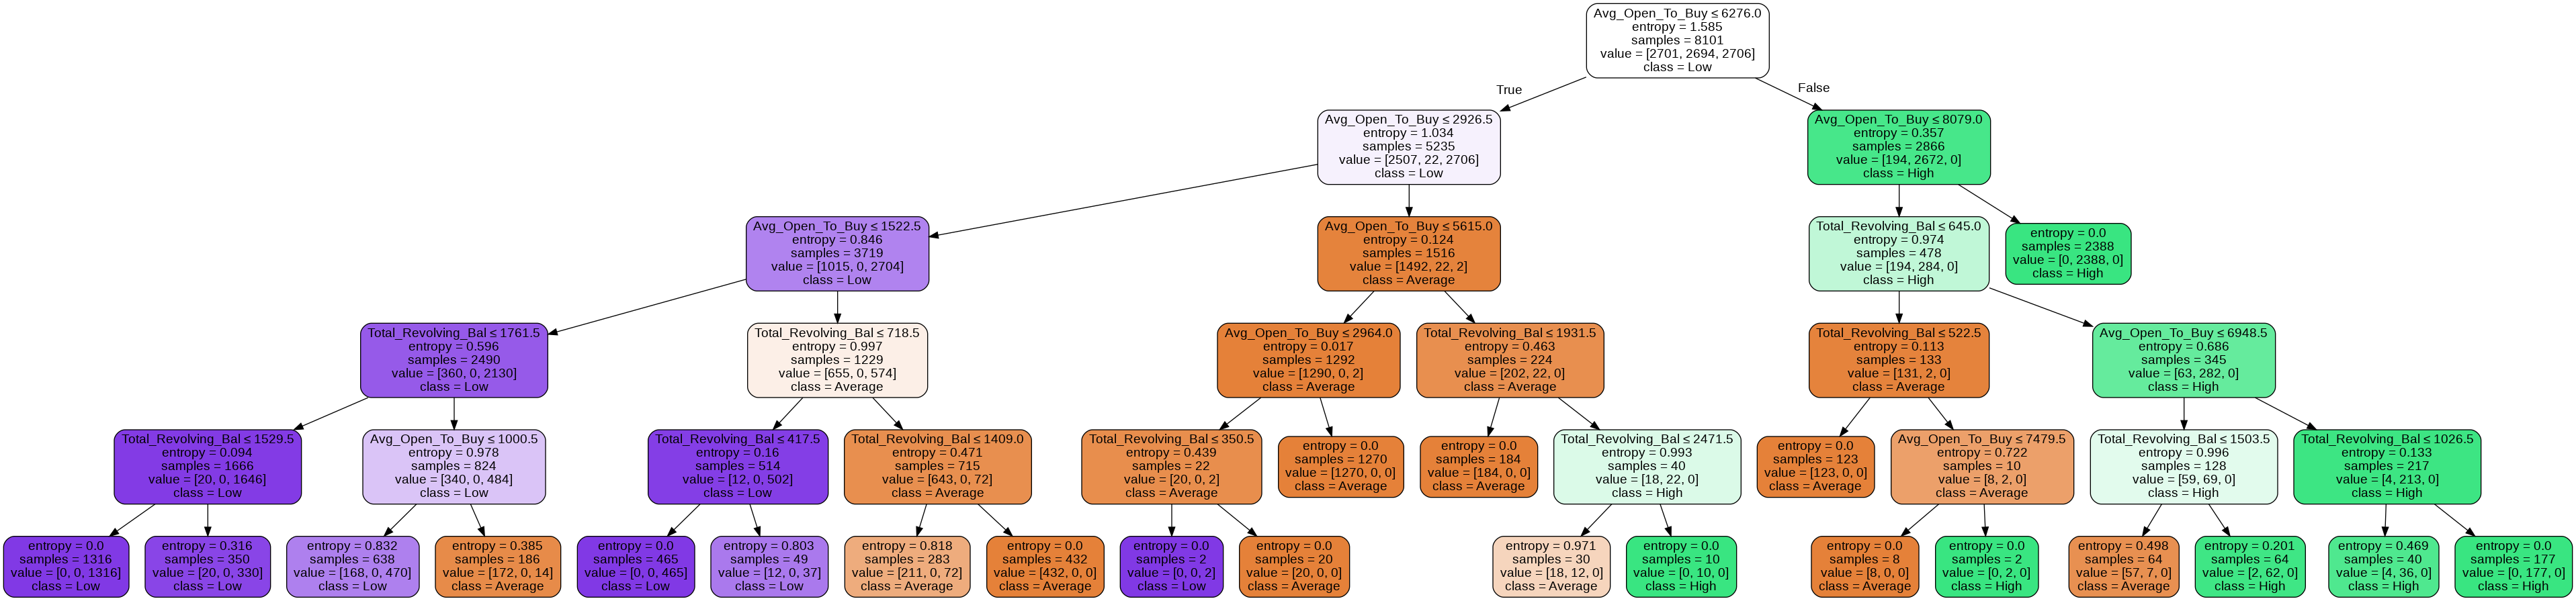

In [140]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('bank.png')
Image(graph.create_png())